
image 1/1 /home/hugo/ultralytics/ultralytics/bus.jpg: 800x608 1 bus, 3 persons, 7.8ms
Speed: 2.5ms preprocess, 7.8ms inference, 0.9ms postprocess per image at shape (1, 3, 800, 608)


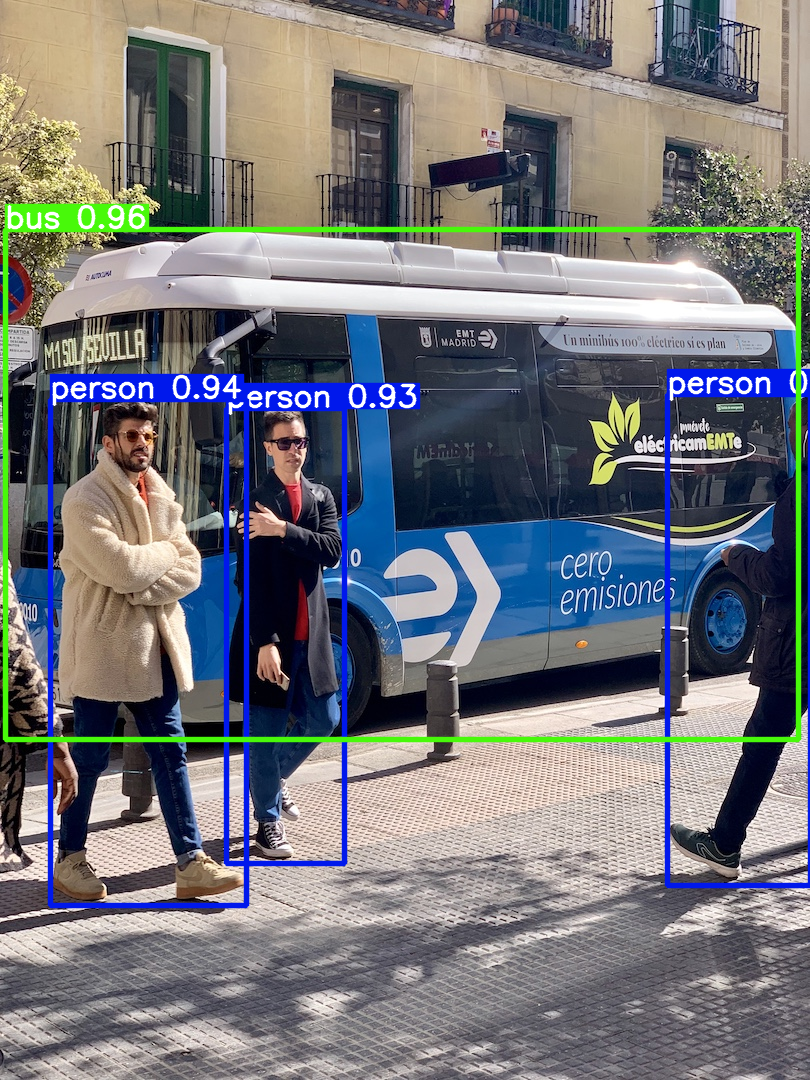

In [3]:
# import os
# os.chdir("/home/hugo/yolov10/yolov10FX")
from ultralytics import YOLOv10
import cv2
# import matplotlib.pyplot as plt
# model = YOLOv10.from_pretrained('jameslahm/yolov10n')
# or
# wget https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10{n/s/m/b/l/x}.pt
model = YOLOv10('/home/hugo/yolov10/models/v10s_bdd/best.pt')
results = model.predict("/home/hugo/ultralytics/ultralytics/bus.jpg")
annotated_image = results[0].plot()
from PIL import Image 
Image.fromarray(annotated_image[..., ::-1])

In [1]:
from ultralytics import YOLOv10
model = YOLOv10('/home/hugo/yolov10/bdd100k-FX/detect/train/weights/best.pt')
# results = model.predict("/home/hugo/ultralytics/ultralytics/bus.jpg")
# annotated_image = results[0].plot()
# from PIL import Image 
# Image.fromarray(annotated_image[..., ::-1])
model.val(data=f"/home/hugo/datasets/ID-voc-OOD-coco/dataset.yaml", plots=True, save_json=True, batch=16, imgsz=800, conf=0.25) 

/home/hugo/miniconda3/envs/yolov10FX/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.0.1+cu117 CUDA:0 (NVIDIA RTX A4000 Laptop GPU, 8192MiB)
YOLOv10s summary (fused): 293 layers, 8050440 parameters, 0 gradients, 24.5 GFLOPs


val: Scanning /home/hugo/datasets/ID-voc-OOD-coco/labels/val.cache... 0 images, 930 backgrounds, 0 corrupt: 100%|██████████| 930/930 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /home/hugo/datasets/ID-voc-OOD-coco/labels/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/59 [00:00<?, ?it/s]

In [2]:
results[0].logits.sigmoid().amax(1)

tensor([0.9598, 0.9405, 0.9364, 0.9266], device='cuda:0')

In [3]:
import numpy as np
import torch
torch.argmax(results[0].logits.sigmoid(), axis=1)

tensor([ 5, 14, 14, 14], device='cuda:0')

In [4]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 5., 14., 14., 14.], device='cuda:0')
conf: tensor([0.9598, 0.9405, 0.9364, 0.9266], device='cuda:0')
data: tensor([[  5.7312, 229.9185, 798.0008, 739.6393,   0.9598,   5.0000],
        [ 50.3479, 399.4733, 246.1628, 905.8849,   0.9405,  14.0000],
        [667.6293, 394.5419, 810.0000, 885.3650,   0.9364,  14.0000],
        [226.6982, 408.0308, 344.9583, 863.6292,   0.9266,  14.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([4, 6])
xywh: tensor([[401.8660, 484.7789, 792.2697, 509.7208],
        [148.2553, 652.6791, 195.8150, 506.4117],
        [738.8147, 639.9534, 142.3707, 490.8231],
        [285.8282, 635.8300, 118.2601, 455.5984]], device='cuda:0')
xywhn: tensor([[0.4961, 0.4489, 0.9781, 0.4720],
        [0.1830, 0.6043, 0.2417, 0.4689],
        [0.9121, 0.5925, 0.1758, 0.4545],
        [0.3529, 0.5887, 0.1460, 0.4219]], device='cuda:0')
xyxy: tensor([[  5.7312, 229.91

# analysis on predictions json

In [3]:
import json
# read json file
with open('/home/hugo/yolov10/yolov10FX/runs/detect/val17/predictions.json') as f:
  data = json.load(f)
count_dict = {}
for i in range(20):
    count_dict[i] = []
for d in data:
    count_dict[d['category_id']].append(d['score'])
sum = 0
for k,v in count_dict.items():
    selected = [s for s in v if s >= 0.393]
    print(k, len(selected))
    sum += len(selected)
print("total OOD counts: ", sum)

0 0
1 4
2 466
3 10
4 197
5 0
6 23
7 179
8 15
9 66
10 0
11 236
12 46
13 0
14 175
15 0
16 51
17 0
18 0
19 0
total OOD counts:  1468


In [4]:
data[0]

{'image_id': '849fbe1aeb7f16c7',
 'category_id': 2,
 'bbox': [275.966, 60.002, 23.5, 19.626],
 'score': 0.02164,
 'logits': [-12.740935325622559,
  -11.040182113647461,
  -3.8113083839416504,
  -9.034619331359863,
  -8.316997528076172,
  -13.069997787475586,
  -10.296449661254883,
  -9.651390075683594,
  -10.176111221313477,
  -9.098444938659668,
  -12.75827693939209,
  -8.586512565612793,
  -10.174857139587402,
  -12.6909818649292,
  -7.91584587097168,
  -12.700249671936035,
  -7.284456253051758,
  -12.763843536376953,
  -12.924630165100098,
  -12.696242332458496]}

# monitor evaluation

In [4]:

# extract the logits and labels from the json file
import numpy as np
import json
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data
def json2npy(id, threshold, yolo_version, dataset_name):
    file_path = f"/home/hugo/yolo-monitoring/{yolo_version}/{id.upper()}/{dataset_name}.json"
    data = load_json(file_path)
    logits = []
    labels = []
    for i in range(len(data)):
        if data[i]["score"] > threshold:
            logits.append(data[i]["logits"])
            labels.append(data[i]["category_id"])
    logits = np.array(logits)
    labels = np.array(labels)
    np.save(f"/home/hugo/yolo-monitoring/{yolo_version}/{id.upper()}/{dataset_name}_logits.npy", logits)
    np.save(f"/home/hugo/yolo-monitoring/{yolo_version}/{id.upper()}/{dataset_name}_labels.npy", labels)

In [4]:
json2npy("voc", 0.393, "v10", "voc-train")

In [5]:
json2npy("voc", 0.393, "v10", "voc-val")

In [15]:
json2npy("voc", 0.393, "v10", "coco-ood")

In [16]:
json2npy("voc", 0.393, "v10", "open-ood")

In [2]:
import os 
os.chdir("/home/hugo/yolo-monitoring/bam-ood/src")
import json
import numpy as np
import pickle
import os
import tqdm
from utils.monitor_construction import features_clustering_by_k_start, monitor_construction_from_features
from utils.evaluation import get_distance_dataset, compute_fpr95, get_distance_cls

def npy2feats_dict(id, yolo_version, dataset_name):
    logits = np.load(f"/home/hugo/yolo-monitoring/{yolo_version}/{id.upper()}/{dataset_name}_logits.npy")
    labels = np.load(f"/home/hugo/yolo-monitoring/{yolo_version}/{id.upper()}/{dataset_name}_labels.npy")
    feats_dict = dict()
    for i in range(len(logits)):
        label = labels[i]
        if label not in feats_dict:
            feats_dict[label] = []
        feats_dict[label].append(logits[i])
    for k,v in feats_dict.items():
        feats_dict[k] = np.array(v)
    return feats_dict

def load_pkl(file_path):
    with open(file_path, 'rb') as f:
        pkl_file = pickle.load(f)
    return pkl_file

def save_pkl(file_path, pkl_file):
    with open(file_path, 'wb') as f:
        pickle.dump(pkl_file, f)

def eval(dataset_name, monitor_dict):
    feats_dict_val = npy2feats_dict(id, dataset_name)
    total = 0
    accept = 0
    for i in monitor_dict.keys():
        if i not in feats_dict_val:
            continue
        total += len(feats_dict_val[i])
        my_list = monitor_dict[i].make_verdicts(feats_dict_val[i])
        sum_of_true = sum(1 for item in my_list if item)
        accept += sum_of_true
    return round(accept/total, 4)

def compute_fpr95(id, monitor_dict, yolo_version, threshold, datasets):
    fpr95 = []
    for dataset_name in datasets:
        feats_ood = npy2feats_dict(id, yolo_version, dataset_name)
        distances_dict = get_distance_dataset(monitor_dict, feats_ood)
        distances_ood = [distance for k, v in distances_dict.items() for distance in v]
        count = sum(1 for distance in distances_ood if distance <= threshold)
        percentage = round((count / len(distances_ood)) * 100, 2)
        fpr95.append(percentage)
    mean_fpr95 = round(sum(fpr95) / len(fpr95), 2)
    # print(f"Mean FPR95: {mean_fpr95}%")
    fpr95.append(mean_fpr95)
    return fpr95

def main(id, density, yolo_version):
    monitor_dict = {}
    feats_dict = npy2feats_dict(id, yolo_version, f"{id}-train")
    for k, v in tqdm.tqdm(feats_dict.items(), desc="category loop", leave=False):
        if len(v) < density:
            continue
        k_start = round(len(v)/density)
        clustering_results = features_clustering_by_k_start(v, k_start)
        monitor_dict[k] = monitor_construction_from_features(v, clustering_results)
    os.makedirs(f"monitors/{yolo_version}/{id}/", exist_ok=True)
    save_pkl(f"monitors/{yolo_version}/{id}/{density}.pkl", monitor_dict)
    feats_id = npy2feats_dict(id, yolo_version, f"{id}-val")
    distances_dict = get_distance_dataset(monitor_dict, feats_id)
    distances_id = [distance for k, v in distances_dict.items() for distance in v]
    sorted_distances = sorted(distances_id)
    threshold_index = int(len(sorted_distances) * 0.95)
    threshold = sorted_distances[threshold_index]
    print(f"Threshold: {threshold}")
    if id == "voc":
        datasets =["coco-ood", "open-ood"]  
    else:
        datasets =["coco-ood", "open-ood", "voc-ood"]
    return compute_fpr95(id, monitor_dict, yolo_version, threshold, datasets=datasets)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [5]:
main("voc", 5, "v10")

category loop:   0%|          | 0/14 [00:00<?, ?it/s]

Threshold: 6.0234


[40.41, 48.71, 44.56]

# evaluations with other OoD methods

In [3]:
import torch 
import numpy as np
# build msp method (pass in pre-saved logits)
def msp_postprocess(logits):
    score = torch.softmax(logits, dim=1)
    conf, pred = torch.max(score, dim=1)
    return pred, conf
def ebo_postprocess(logits, temperature=1):
    score = torch.softmax(logits, dim=1)
    _, pred = torch.max(score, dim=1)
    conf = temperature * torch.logsumexp(logits / temperature,
                                                dim=1)
    return pred, conf
def maxlogits_postprocess(logits):
    conf, pred = torch.max(logits, dim=1)
    return pred, conf
import numpy as np
import torch
import sklearn.covariance

def mahalanobis_compute_mean(logits):
    num_classes = logits[0].shape[0]
    all_preds = np.array([logit.argmax(0) for logit in logits])
    all_preds = torch.from_numpy(all_preds)
    all_labels = all_preds
    all_feats = torch.from_numpy(logits)
    class_mean = []
    centered_data = []
    for c in range(num_classes):
        class_samples = all_feats[all_labels.eq(c)].data
        if class_samples.size(0) > 0:  # Check if there are samples for the class
            mean = class_samples.mean(0)
            centered = class_samples - mean.view(1, -1)
        else:  # If no samples, use a placeholder (e.g., zeros)
            feat_dim = all_feats.size(1)
            mean = torch.zeros(feat_dim)
            centered = torch.empty((0, feat_dim))  # Empty tensor with the correct second dimension
        class_mean.append(mean)
        centered_data.append(centered)

    # Ensure there's at least one class with samples to avoid errors in covariance calculation
    if len(torch.cat(centered_data)) == 0:
        raise ValueError("No samples available for any class to compute covariance.")
    
    group_lasso = sklearn.covariance.EmpiricalCovariance(assume_centered=False)
    group_lasso.fit(torch.cat(centered_data).cpu().numpy().astype(np.float32))
    precision = torch.from_numpy(group_lasso.precision_).float()
    return class_mean, precision

def mahalanobis_postprocess(logits, class_mean, precision):
    num_classes = logits[0].shape[0]
    pred = logits.argmax(1)
    precision = precision.double()
    class_scores = torch.zeros((logits.shape[0], num_classes))
    for c in range(num_classes):
        if class_mean[c].numel() > 0:  # Check if the class mean was computed
            # Efficient computation of Mahalanobis distance for each sample
            for i in range(logits.shape[0]):
                tensor = logits[i] - class_mean[c].double()
                # Here, we avoid the large matrix multiplication and directly compute the distance
                score = torch.dot(tensor, torch.matmul(precision, tensor))
                class_scores[i, c] = -score  # Negative score to match the original logic

    conf = torch.max(class_scores, dim=1)[0]
    return pred, conf


In [2]:
import numpy as np
import json
import torch
from openood.evaluators.metrics import compute_all_metrics
import os 
os.chdir("/home/hugo/yolo-monitoring/v10")
def process_and_evaluate(id, postprocess_method, dataset_names=["coco-ood", "open-ood", "voc-ood"], modes=['train', 'val']):
    results = dict()
    results['id'] = dict()
    for mode in modes:
        results['id'][mode] = dict()
        results['id'][mode]['logits'] = np.load(f'{id.upper()}/{id}-{mode}_logits.npy')
        results['id'][mode]['labels'] = np.load(f'{id.upper()}/{id}-{mode}_labels.npy')

    results['ood'] = dict()
    for dataset_name in dataset_names:
        results['ood'][dataset_name] = dict()
        results['ood'][dataset_name]['logits'] = np.load(f'{id.upper()}/{dataset_name}_logits.npy')
        results['ood'][dataset_name]['labels'] = np.full((results['ood'][dataset_name]['logits'].shape[0], ), -1)
    # print("loading done")
    postprocess_results = dict()
    postprocess_results['id'] = dict()
    if postprocess_method == mahalanobis_postprocess:
        class_mean, precision = mahalanobis_compute_mean(results['id']['train']['logits'])
        del results['id']['train']
        pred, conf = postprocess_method(torch.from_numpy(results['id']['val']['logits']), class_mean, precision)
    else:
        pred, conf = postprocess_method(torch.from_numpy(results['id']['val']['logits']))
    
    pred, conf = pred.numpy(), conf.numpy()
    gt = results['id'][mode]['labels']
    postprocess_results['id'][mode] = [pred, conf, gt]
    # print("ID processing done")
    postprocess_results['ood'] = dict()
    for dataset_name in dataset_names:
        if postprocess_method == mahalanobis_postprocess:
            pred, conf = postprocess_method(torch.from_numpy(results['ood'][dataset_name]['logits']), class_mean, precision)
        else:
            pred, conf = postprocess_method(torch.from_numpy(results['ood'][dataset_name]['logits']))
        pred, conf = pred.numpy(), conf.numpy()
        gt = results['ood'][dataset_name]['labels']
        gt = -1 * np.ones_like(gt)
        postprocess_results['ood'][dataset_name] = [pred, conf, gt]
    # print("OOD processing done")
    return eval_ood(postprocess_results, dataset_names)

def eval_ood(postprocess_results, dataset_names):
    [id_pred, id_conf, id_gt] = postprocess_results['id']['val']
    metrics_list = []
    fpr95 = []
    for dataset_name in dataset_names:
        [ood_pred, ood_conf, ood_gt] = postprocess_results['ood'][dataset_name]

        pred = np.concatenate([id_pred, ood_pred])
        conf = np.concatenate([id_conf, ood_conf])
        label = np.concatenate([id_gt, ood_gt])

        ood_metrics = compute_all_metrics(conf, label, pred)
        fpr95.append(ood_metrics[0])
        metrics_list.append(ood_metrics)
    metrics_list = np.array(metrics_list)
    metrics_mean = np.mean(metrics_list, axis=0)   
    fpr95.append(metrics_mean[0])
    return [round(fpr, 4) for fpr in fpr95]

In [6]:
postprocess_dict = {"msp": msp_postprocess, "ebo": ebo_postprocess, "maxlogits": maxlogits_postprocess}
score_thresh_dict = {"voc": 0.39}
for id in ["voc"]:
    print(f"evaluation on {id}")
    for k,v in postprocess_dict.items():
        print(f"evalution using {k}")
        if id == "voc":
            print(process_and_evaluate(id, v, dataset_names=["coco-ood", "open-ood"]))
        else:
            print(process_and_evaluate(id, v, score_thresh_dict[id]))

evaluation on voc
evalution using msp
[0.5236, 0.7113, 0.6175]
evalution using ebo
[0.6911, 0.8164, 0.7538]
evalution using maxlogits
[0.691, 0.8163, 0.7537]


# image-wise verdict

In [1]:
import os
import json
import pickle
import torch
import tqdm
import pandas as pd

# Change the current working directory
os.chdir("/home/hugo/yolo-monitoring/bam-ood/src")

from utils.evaluation import get_distance_cls

def load_json(file_path):
    """
    Load a JSON file and return its content.
    """
    with open(file_path, 'r') as f:
        return json.load(f)

def load_pickle(file_path):
    """
    Load a pickle file and return its content.
    """
    with open(file_path, 'rb') as f:
        return pickle.load(f)

def calculate_distances(category_id, detections):
    """
    Calculate distances for a batch of detections.
    """
    logits_batch = torch.tensor([logits for _, logits in detections])
    monitor = monitors_dict[category_id]
    distances = get_distance_cls(logits_batch, monitor)
    return distances

def calculate_threshold(distance_data):
    """
    Calculate a threshold value based on the 95th percentile of average distances.
    """
    avg_distances = [v["avg_distance"] for v in distance_data.values()]
    threshold_index = int(len(avg_distances) * 0.95)
    threshold = sorted(avg_distances)[threshold_index]
    return threshold

def compute_fpr95(distance_data, threshold):
    """
    Compute the FPR95 metric for both images and instances.
    """
    accepted_images = sum(v["avg_distance"] < threshold for v in distance_data.values())
    fpr95_images = round(accepted_images / len(distance_data) * 100, 2)

    accepted_instances = sum(v["count"] for v in distance_data.values() if v["avg_distance"] < threshold)
    total_instances = sum(v["count"] for v in distance_data.values())
    fpr95_instances = round(accepted_instances / total_instances * 100, 2)

    return fpr95_images, fpr95_instances

def process_dataset(yolo_version, id, dataset_name, conf_thresh):
    """
    Process a dataset to compute average distances and return the distance data.
    """
    file_path = f"/home/hugo/yolo-monitoring/{yolo_version}/{id.upper()}/{dataset_name}.json"
    data = load_json(file_path)

    filtered_data = [item for item in data if item['score'] >= conf_thresh]

    detections_by_category = {}
    for d in tqdm.tqdm(filtered_data):
        img_id, logits, category_id = d["image_id"], d["logits"], d["category_id"]
        detections_by_category.setdefault(category_id, []).append((img_id, logits))

    distance_data = {}
    for category_id, detections in tqdm.tqdm(detections_by_category.items()):
        distances = calculate_distances(category_id, detections)
        for (img_id, _), distance in zip(detections, distances):
            if img_id not in distance_data:
                distance_data[img_id] = {"distance": [], "count": 0}
            distance_data[img_id]["distance"].append(distance)
            distance_data[img_id]["count"] += 1

    for img_data in distance_data.values():
        distances = torch.tensor(img_data["distance"])
        img_data["avg_distance"] = torch.mean(distances).item()

    return distance_data

# Configuration
# yolo_version = "v10"
# id = "voc"
# conf_thresh = 0.393
# density = 5

# monitors_dict = load_pickle(f"monitors/{yolo_version}/{id}/{density}.pkl")

# # Process datasets and compute FPR95
# results = {}
# for dataset in ["voc-val", "coco-ood", "open-ood"]:
#     distance_data = process_dataset(yolo_version, id, dataset, conf_thresh)
#     if dataset == "voc-val":
#         id_threshold = calculate_threshold(distance_data)
#     fpr95_img, fpr95_inst = compute_fpr95(distance_data, id_threshold)
#     results[dataset] = {"FPR95_img": fpr95_img, "FPR95_ins": fpr95_inst}

# # Visualize the results in a pandas DataFrame
# results_df = pd.DataFrame(results).T
# results_df

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [6]:
yolo_version = "v10"
id = "voc"
conf_thresh = 0.393
density = 5
dataset_name = "voc-val"

def generate_detections_by_category(yolo_version, id, dataset_name, conf_thresh):
    file_path = f"/home/hugo/yolo-monitoring/{yolo_version}/{id.upper()}/{dataset_name}.json"
    data = load_json(file_path)
    filtered_data = [item for item in data if item['score'] >= conf_thresh]
    detections_by_category = {}
    for d in tqdm.tqdm(filtered_data):
        img_id, logits, category_id = d["image_id"], d["logits"], d["category_id"]
        detections_by_category.setdefault(category_id, []).append((img_id, logits))
    return detections_by_category

In [7]:
def ebo_postprocess(logits, temperature=1):
    score = torch.softmax(logits, dim=1)
    _, pred = torch.max(score, dim=1)
    conf = temperature * torch.logsumexp(logits / temperature,
                                                dim=1)
    return pred, conf

In [38]:
import torch 
import numpy as np
# build msp method (pass in pre-saved logits)
def msp_postprocess(logits):
    score = torch.softmax(logits, dim=1)
    conf, pred = torch.max(score, dim=1)
    return pred, conf

In [39]:
def maxlogits_postprocess(logits):
    conf, pred = torch.max(logits, dim=1)
    return pred, conf

In [40]:
def calculate_conf(postprocess, detections):
    logits_batch = torch.tensor([logits for _, logits in detections])
    pred, conf = postprocess(logits_batch)
    return pred, conf

In [29]:
def calculate_threshold(distance_data):
    """
    Calculate a threshold value based on the 95th percentile of average distances.
    """
    avg_distances = [v["avg_distance"] for v in distance_data.values()]
    threshold_index = int(len(avg_distances) * 0.95)
    threshold = sorted(avg_distances)[threshold_index]
    return threshold

In [30]:
# calculate_threshold(distance_data)

3.426867723464966

In [42]:
import tqdm
import torch
import numpy as np
from openood.evaluators.metrics import compute_all_metrics

def process_detections(yolo_version, id, dataset_name, conf_thresh, postprocess):
    detections_by_category = generate_detections_by_category(yolo_version, id, dataset_name, conf_thresh)
    distance_data = {}
    
    for category_id, detections in tqdm.tqdm(detections_by_category.items()):
        pred, conf = calculate_conf(postprocess, detections)
        for (img_id, _), distance in zip(detections, conf):
            if img_id not in distance_data:
                distance_data[img_id] = {"distance": [], "count": 0}
            distance_data[img_id]["distance"].append(distance)
            distance_data[img_id]["count"] += 1

    for img_data in distance_data.values():
        distances = torch.tensor(img_data["distance"])
        img_data["avg_distance"] = torch.mean(distances).item()

    return distance_data

def extract_predictions(distance_data, label_value):
    pred = [1] * len(distance_data)
    conf = [data["avg_distance"] for data in distance_data.values()]
    labels = [label_value] * len(pred)
    return pred, conf, labels


In [57]:
def eval_ood(yolo_version, id, conf_thresh, postprocess):
    fpr95 = []
    # Process in-distribution data
    id_data = process_detections(yolo_version, id, f"{id}-val", conf_thresh, postprocess)
    pred_id, conf_id, gt_id = extract_predictions(id_data, 1)
    print("First 5 ID conf: ", conf_id[:5])
    # Process out-of-distribution data
    ood_data = process_detections(yolo_version, id, "coco-ood", conf_thresh, postprocess)
    pred_ood, conf_ood, gt_ood = extract_predictions(ood_data, -1)
    print("First 5 OOD conf: ", conf_ood[:5])
    # Concatenate results
    pred = np.concatenate([pred_id, pred_ood])
    conf = np.concatenate([conf_id, conf_ood])
    label = np.concatenate([gt_id, gt_ood])
    # Compute metrics
    ood_metrics = compute_all_metrics(conf, label, pred)
    fpr95.append(ood_metrics[0])
    # Process out-of-distribution data
    ood_data = process_detections(yolo_version, id, "open-ood", conf_thresh, postprocess)
    pred_ood, conf_ood, gt_ood = extract_predictions(ood_data, -1)
    # Concatenate results
    pred = np.concatenate([pred_id, pred_ood])
    conf = np.concatenate([conf_id, conf_ood])
    label = np.concatenate([gt_id, gt_ood])
    # Compute metrics
    ood_metrics = compute_all_metrics(conf, label, pred)
    fpr95.append(ood_metrics[0])
    fpr95.append(np.mean(fpr95))
    return fpr95



In [49]:
eval_ood("v10", "voc", 0.393, msp_postprocess)

100%|██████████| 12/12 [00:00<00:00, 2162.57it/s]


[0.5324587197466637, 0.7011988237955213, 0.6168287717710925]

In [58]:
eval_ood("v10", "voc", 0.393, ebo_postprocess)

100%|██████████| 14/14 [00:00<00:00, 385.15it/s]


First 5 ID conf:  [0.34858518838882446, 1.659106731414795, 3.3109421730041504, 1.6277323961257935, 1.2328850030899048]


100%|██████████| 14/14 [00:00<00:00, 4051.63it/s]


First 5 OOD conf:  [0.5034129619598389, 0.9009484052658081, 1.8473930358886719, 1.2941311597824097, -0.30572226643562317]


100%|██████████| 12/12 [00:00<00:00, 2005.80it/s]


[0.7032345623162181, 0.7729020583578375, 0.7380683103370278]

In [59]:
eval_ood("v10", "voc", 0.393, maxlogits_postprocess)

100%|██████████| 14/14 [00:00<00:00, 402.71it/s]


First 5 ID conf:  [0.038091182708740234, 1.6467962265014648, 3.310927391052246, 1.6270740032196045, 1.2309751510620117]


100%|██████████| 14/14 [00:00<00:00, 4746.61it/s]


First 5 OOD conf:  [0.3237621784210205, 0.8327722549438477, 1.8403100967407227, 1.2324810028076172, -0.3735823631286621]


100%|██████████| 12/12 [00:00<00:00, 2436.78it/s]


[0.7032345623162181, 0.7729020583578375, 0.7380683103370278]